<a href="https://colab.research.google.com/github/riponalmamun/-Cyber-Threat-Detection/blob/main/%F0%9F%9A%80Cyber_Threat_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

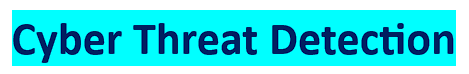

#Done By:
#Name: Md Ripon Al Mamun , ID:2021-2-60-083


# About Dataset
The CyberFedDefender dataset is a simulated dataset designed for developing and testing federated learning-based cyber threat detection models. This dataset is tailored for research and experimentation in distributed anomaly detection and privacy-preserving cybersecurity frameworks. It includes traffic features commonly used in intrusion detection systems (IDS) with a focus on cloud and edge computing environments. Each record represents network traffic metadata, with labeled instances of both normal and malicious activities, making it ideal for machine learning applications in cybersecurity.

# Dataset Features
The dataset consists of 1,430 instances, with 23 features including information on packet size, duration, bytes sent/received, flow statistics, and attack labels. It covers common cyberattacks such as DDoS, Brute Force, and Ransomware, along with normal network traffic.

# Download the Dataset

In [1]:
!gdown --id 1CLHjFufCriU6q6HxN1XR38nCOdQzvrOG

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CLHjFufCriU6q6HxN1XR38nCOdQzvrOG
To: /content/cyberfeddefender_dataset.csv
100% 182k/182k [00:00<00:00, 143MB/s]


# Import All libraries

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
import xgboost as xgb
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import lime
import lime.lime_tabular

# Load dataset

In [3]:
file_path = "/content/cyberfeddefender_dataset.csv"
data = pd.read_csv(file_path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           1430 non-null   object 
 1   Source_IP           1430 non-null   object 
 2   Destination_IP      1430 non-null   object 
 3   Protocol            1430 non-null   object 
 4   Packet_Length       1430 non-null   int64  
 5   Duration            1430 non-null   float64
 6   Source_Port         1430 non-null   int64  
 7   Destination_Port    1430 non-null   int64  
 8   Bytes_Sent          1430 non-null   int64  
 9   Bytes_Received      1430 non-null   int64  
 10  Flags               1430 non-null   object 
 11  Flow_Packets/s      1430 non-null   float64
 12  Flow_Bytes/s        1430 non-null   float64
 13  Avg_Packet_Size     1430 non-null   int64  
 14  Total_Fwd_Packets   1430 non-null   int64  
 15  Total_Bwd_Packets   1430 non-null   int64  
 16  Fwd_He

# Check for null values

In [5]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Timestamp             0
Source_IP             0
Destination_IP        0
Protocol              0
Packet_Length         0
Duration              0
Source_Port           0
Destination_Port      0
Bytes_Sent            0
Bytes_Received        0
Flags                 0
Flow_Packets/s        0
Flow_Bytes/s          0
Avg_Packet_Size       0
Total_Fwd_Packets     0
Total_Bwd_Packets     0
Fwd_Header_Length     0
Bwd_Header_Length     0
Sub_Flow_Fwd_Bytes    0
Sub_Flow_Bwd_Bytes    0
Inbound               0
Attack_Type           0
Label                 0
dtype: int64


In [6]:
data.head()

,Timestamp,Source_IP,Destination_IP,Protocol,Packet_Length,Duration,Source_Port,Destination_Port,Bytes_Sent,Bytes_Received,...,Avg_Packet_Size,Total_Fwd_Packets,Total_Bwd_Packets,Fwd_Header_Length,Bwd_Header_Length,Sub_Flow_Fwd_Bytes,Sub_Flow_Bwd_Bytes,Inbound,Attack_Type,Label
0,2024-10-23 12:00:00,192.168.0.1,192.168.0.1,ICMP,1155,4.01,53,53,675,877,...,512,21,34,256,256,697,1028,1,DDoS,1
1,2024-10-23 12:00:01,192.168.0.7,172.16.0.5,ICMP,1776,3.75,22,22,297,1062,...,1024,14,19,512,256,513,1300,1,DDoS,1
2,2024-10-23 12:00:02,192.168.0.7,10.0.0.3,UDP,627,4.24,80,8080,122,723,...,512,10,41,512,256,250,497,0,DDoS,1
3,2024-10-23 12:00:03,192.168.0.7,10.0.0.3,UDP,1754,3.09,443,443,1626,1703,...,256,37,44,128,256,985,1471,0,Ransomware,0
4,2024-10-23 12:00:04,192.168.0.1,10.0.0.4,UDP,1326,2.52,80,443,1851,771,...,1024,40,16,512,256,1877,595,1,Normal,1


In [7]:
data.tail()

,Timestamp,Source_IP,Destination_IP,Protocol,Packet_Length,Duration,Source_Port,Destination_Port,Bytes_Sent,Bytes_Received,...,Avg_Packet_Size,Total_Fwd_Packets,Total_Bwd_Packets,Fwd_Header_Length,Bwd_Header_Length,Sub_Flow_Fwd_Bytes,Sub_Flow_Bwd_Bytes,Inbound,Attack_Type,Label
1425,2024-10-23 12:23:45,10.0.0.9,10.0.0.3,UDP,1260,0.46,22,8080,722,626,...,256,37,17,512,512,1021,1996,1,Ransomware,1
1426,2024-10-23 12:23:46,10.0.0.9,172.16.0.5,TCP,362,2.02,8080,22,571,1006,...,1024,27,24,128,128,381,260,1,Normal,1
1427,2024-10-23 12:23:47,172.16.0.4,10.0.0.3,TCP,1236,2.11,8080,80,1194,185,...,512,15,46,256,256,1064,170,1,Normal,1
1428,2024-10-23 12:23:48,172.16.0.10,172.16.0.4,UDP,1962,1.10,443,8080,176,766,...,64,27,27,256,256,1121,1905,0,Ransomware,0
1429,2024-10-23 12:23:49,172.16.0.3,10.0.0.4,UDP,1221,2.77,53,8080,1453,1136,...,64,26,18,128,512,646,1561,0,Brute Force,0


In [8]:
data.describe()

,Packet_Length,Duration,Source_Port,Destination_Port,Bytes_Sent,Bytes_Received,Flow_Packets/s,Flow_Bytes/s,Avg_Packet_Size,Total_Fwd_Packets,Total_Bwd_Packets,Fwd_Header_Length,Bwd_Header_Length,Sub_Flow_Fwd_Bytes,Sub_Flow_Bwd_Bytes,Inbound,Label
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000
mean,1064.520280,2.586084,1673.184615,1848.512587,1015.900000,1045.531469,24.793007,1070.640140,460.128671,29.279021,29.665734,306.483916,295.742657,1074.735664,1064.494406,0.524476,0.488112
std,572.437816,1.420248,3124.172914,3275.839849,569.400101,572.170268,8.772747,562.422385,360.760328,11.530216,11.224480,159.092478,160.405437,565.793704,542.027082,0.499575,0.500034
min,64.000000,0.100000,22.000000,22.000000,65.000000,64.000000,10.000000,100.200000,64.000000,10.000000,10.000000,128.000000,128.000000,130.000000,128.000000,0.000000,0.000000
25%,562.000000,1.360000,53.000000,53.000000,503.000000,521.000000,17.200000,586.175000,256.000000,19.000000,20.000000,128.000000,128.000000,583.500000,601.500000,0.000000,0.000000
50%,1066.000000,2.605000,80.000000,80.000000,1019.000000,1045.000000,24.900000,1072.050000,256.000000,29.000000,30.000000,256.000000,256.000000,1083.000000,1042.000000,1.000000,0.000000
75%,1539.000000,3.840000,443.000000,443.000000,1497.000000,1538.500000,32.100000,1559.300000,1024.000000,39.000000,39.000000,512.000000,512.000000,1564.000000,1527.000000,1.000000,1.000000
max,2046.000000,5.000000,8080.000000,8080.000000,2045.000000,2044.000000,40.000000,2047.900000,1024.000000,49.000000,49.000000,512.000000,512.000000,2047.000000,2045.000000,1.000000,1.000000


#Define features and target
# Drop the 'Timestamp' and IP address columns as they are not numerical

In [9]:
X = data.drop(['Attack_Type', 'Timestamp', 'Source_IP', 'Destination_IP'], axis=1)
# Drop 'Source_IP', 'Destination_IP' here
y = data['Label']

# Split dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to handle numerical and categorical features
# Numerical features are scaled using StandardScaler
# Categorical features are one-hot encoded using OneHotEncoder
numerical_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)]) # handle_unknown='ignore' added to handle unseen categories during testing


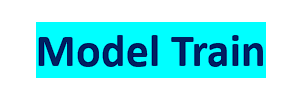

# Create a pipeline to combine preprocessing and model training

In [11]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier(random_state=42))])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       146

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286

1.0


# Define hyperparameter grid for GridSearchCV

In [12]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("Best Hyperparameters:", grid_search.best_params_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       146

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286

1.0
Best Hyperparameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


# Create pipeline with Random Forest

In [13]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Cross-validation
cv_scores_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy:", np.mean(cv_scores_rf))

# Train and evaluate
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Cross-Validation Accuracy: 1.0
Random Forest Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       146

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286



# XGBoost model

In [14]:
!pip install xgboost

In [15]:
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Cross-validation
cv_scores_xgb = cross_val_score(pipeline_xgb, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost Cross-Validation Accuracy:", np.mean(cv_scores_xgb))

# Train and evaluate
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Cross-Validation Accuracy: 1.0
XGBoost Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       146

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286



# Stacking

In [16]:
# Base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]

# Meta model
meta_model = LogisticRegression()

# Stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
pipeline_stack = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', stacking_clf)
])

# Train and evaluate
pipeline_stack.fit(X_train, y_train)
y_pred_stack = pipeline_stack.predict(X_test)
print("Stacking Test Accuracy:", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))


Stacking Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       146

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286



# Voting

In [17]:
# Voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
], voting='soft')  # Change to 'hard' for hard voting

pipeline_voting = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])

# Train and evaluate
pipeline_voting.fit(X_train, y_train)
y_pred_voting = pipeline_voting.predict(X_test)
print("Voting Test Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))


Voting Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       146

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286



# Decision Tree

Decision Tree Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       146

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286



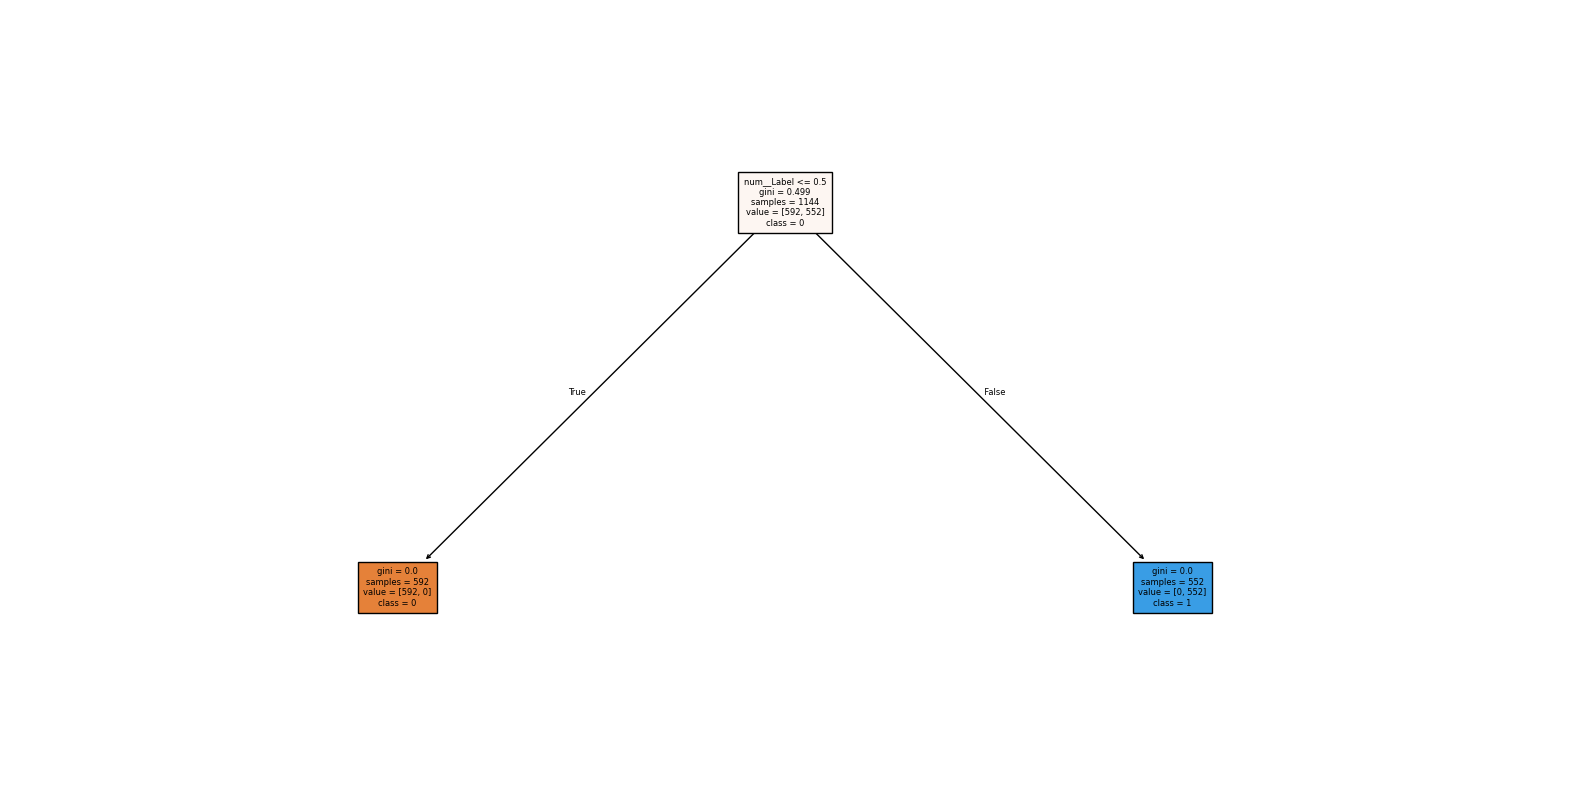

In [23]:
# Assuming X_train and X_test are your DataFrames
# Identify categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X_train.select_dtypes(exclude=['object']).columns.tolist()),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with the preprocessor and the DecisionTreeClassifier
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the pipeline
pipeline_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = pipeline_dt.predict(X_test)

# Evaluate the model
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Plot the decision tree (optional, for visualization)
# Note: Feature names will be modified after one-hot encoding
plt.figure(figsize=(20, 10))
tree.plot_tree(pipeline_dt.named_steps['classifier'], filled=True,
               feature_names=pipeline_dt.named_steps['preprocessor'].get_feature_names_out(),
               class_names=np.unique(y).astype(str), fontsize=6)
plt.show()

# Hyperparameter Tuning

In [24]:
# Hyperparameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Hyperparameters:", grid_search.best_params_)
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Best Hyperparameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Optimized Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       146

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286



# Define Helper Functions

In [25]:
# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return {"Model": model_name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}


# Collect Metrics for Each Model

In [26]:
# Collect metrics for each model
metrics_list = []

# Random Forest
metrics_list.append(calculate_metrics(y_test, y_pred_rf, "Random Forest"))

# XGBoost
metrics_list.append(calculate_metrics(y_test, y_pred_xgb, "XGBoost"))

# Stacking
metrics_list.append(calculate_metrics(y_test, y_pred_stack, "Stacking"))

# Voting
metrics_list.append(calculate_metrics(y_test, y_pred_voting, "Voting"))

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)


           Model  Accuracy  Precision  Recall  F1-Score
0  Random Forest       1.0        1.0     1.0       1.0
1        XGBoost       1.0        1.0     1.0       1.0
2       Stacking       1.0        1.0     1.0       1.0
3         Voting       1.0        1.0     1.0       1.0


# Plot Bar Chart for Metrics

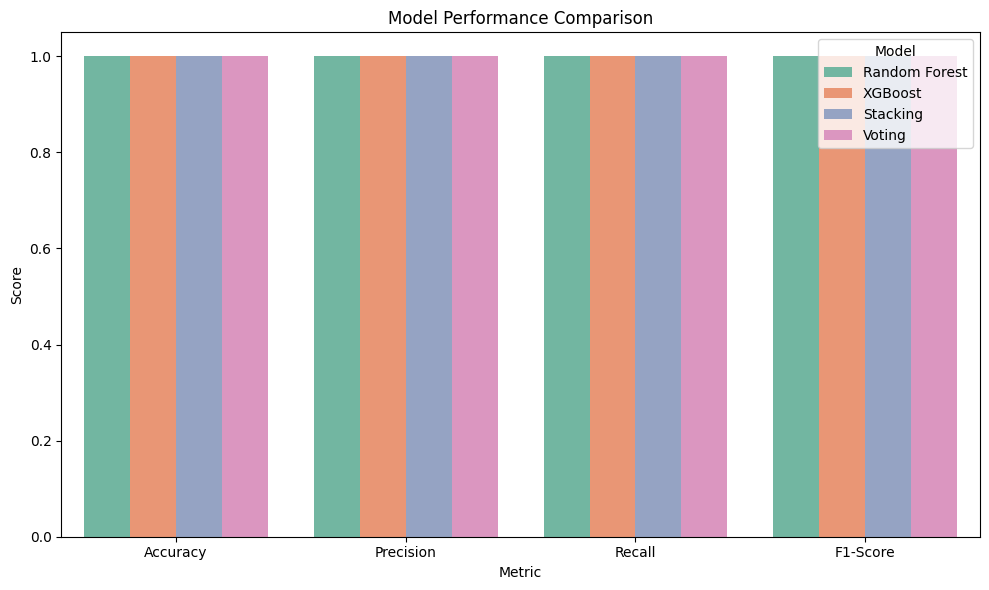

In [27]:
# Bar plot for metrics comparison
plt.figure(figsize=(10, 6))
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

sns.barplot(x="Metric", y="Score", hue="Model", data=metrics_melted, palette="Set2")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


# Cross-Validation:
# Apply cross-validation to evaluate the performance of each ensemble method.
# Document and compare the cross-validation scores for each approach.

In [28]:
# Cross-validation for Stacking
cv_scores_stack = cross_val_score(pipeline_stack, X_train, y_train, cv=5, scoring='accuracy')
print("Stacking Cross-Validation Accuracy:", np.mean(cv_scores_stack))

# Cross-validation for Voting
cv_scores_voting = cross_val_score(pipeline_voting, X_train, y_train, cv=5, scoring='accuracy')
print("Voting Cross-Validation Accuracy:", np.mean(cv_scores_voting))

print("\n--- Cross-Validation Score Comparison ---")
print(f"Random Forest: {np.mean(cv_scores_rf)}")
print(f"XGBoost: {np.mean(cv_scores_xgb)}")
print(f"Stacking: {np.mean(cv_scores_stack)}")
print(f"Voting: {np.mean(cv_scores_voting)}")

Stacking Cross-Validation Accuracy: 1.0
Voting Cross-Validation Accuracy: 1.0

--- Cross-Validation Score Comparison ---
Random Forest: 1.0
XGBoost: 1.0
Stacking: 1.0
Voting: 1.0


# Confusion matrix

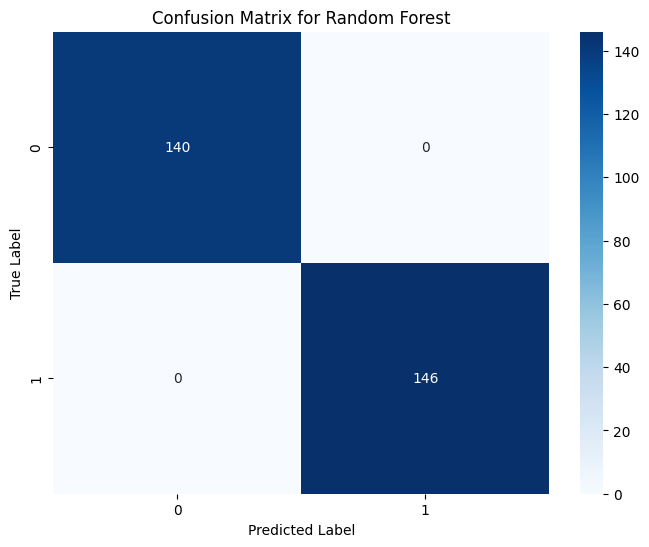

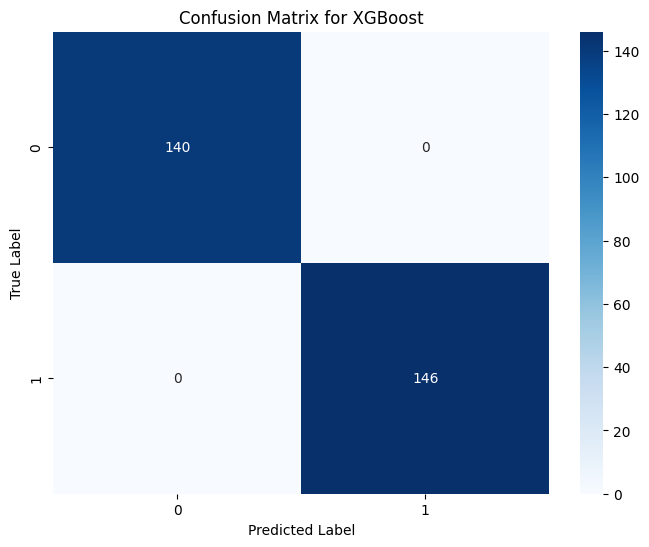

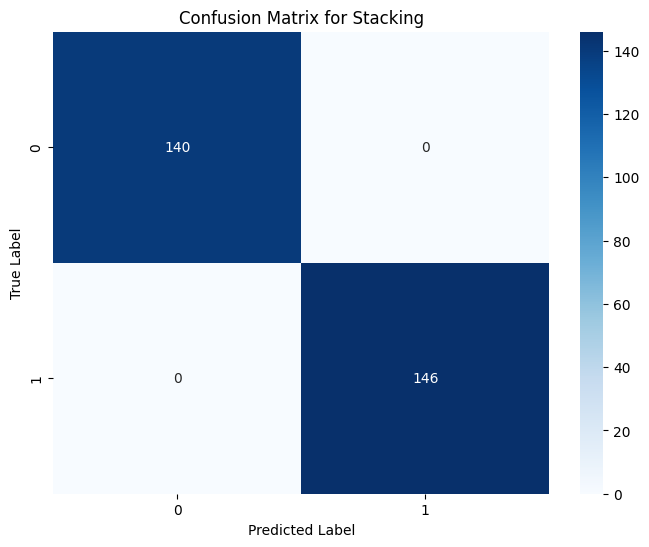

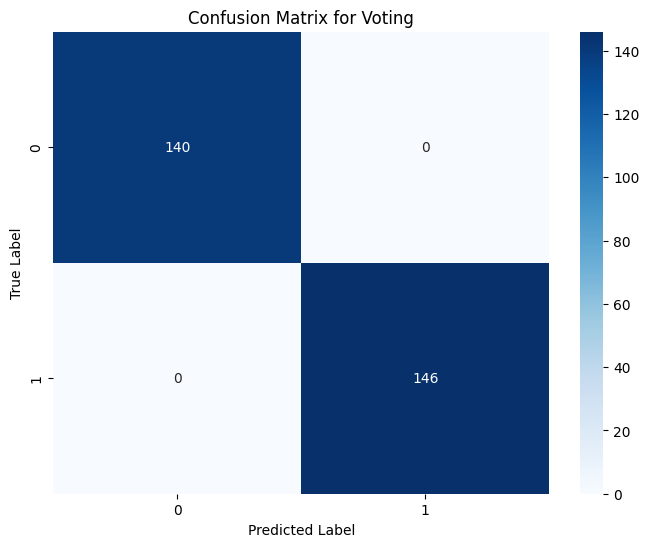

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_rf (or any other y_pred) are defined

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Example usage (replace with desired y_pred)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
plot_confusion_matrix(y_test, y_pred_stack, "Stacking")
plot_confusion_matrix(y_test, y_pred_voting, "Voting")

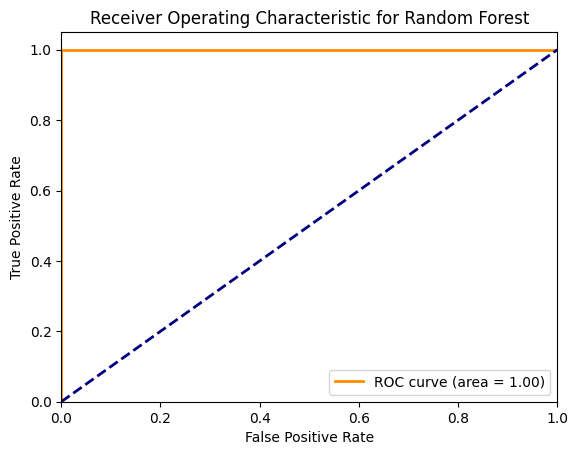

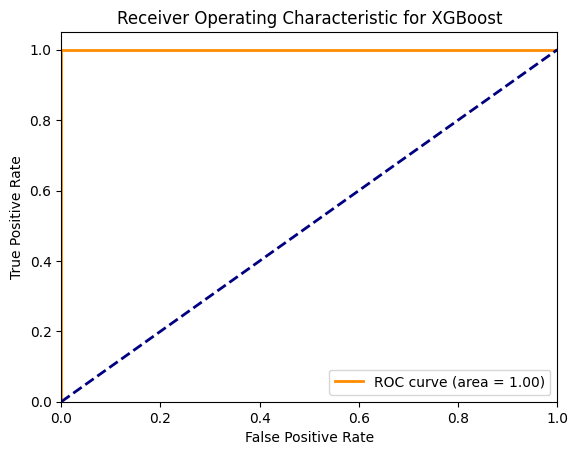

In [32]:
# Assuming y_test and y_pred_prob are defined (probability estimates for the positive class)
# Example:  y_pred_prob = pipeline_rf.predict_proba(X_test)[:, 1]

def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()


# Example usage (replace with your model and predicted probabilities)
# Get predicted probabilities for Random Forest
y_pred_prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_prob_rf, "Random Forest")

# Get predicted probabilities for XGBoost
y_pred_prob_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_prob_xgb, "XGBoost")

# ... similarly for other models (Stacking, Voting)

# Learning Curve

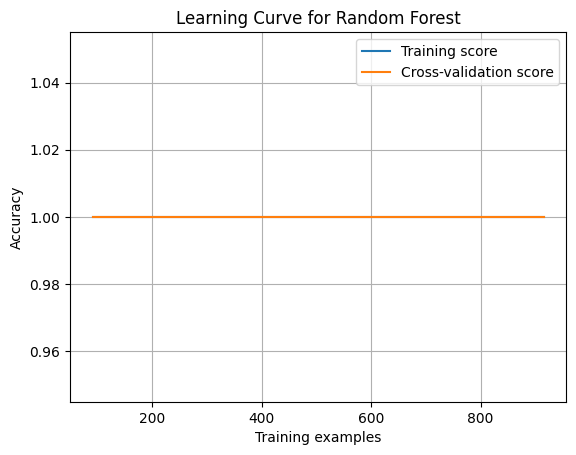

In [34]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Learning Curve for Random Forest
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipeline_rf, X=X_train, y=y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Random Forest')
plt.legend(loc='best')
plt.grid()
plt.show()

# SHAP

In [36]:
!pip install shap

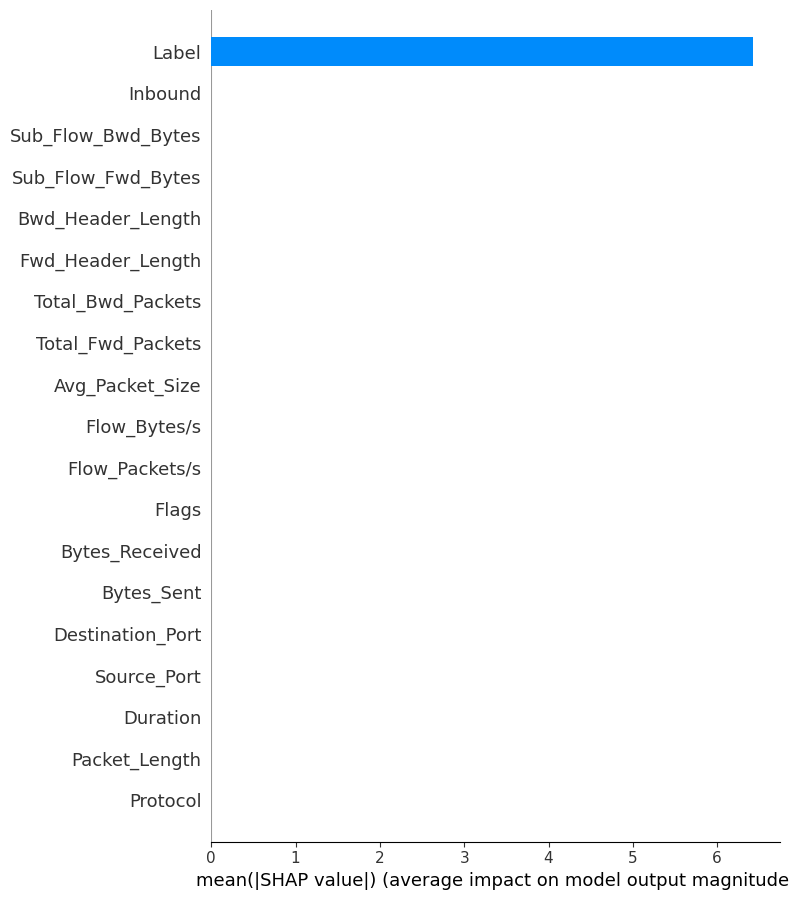

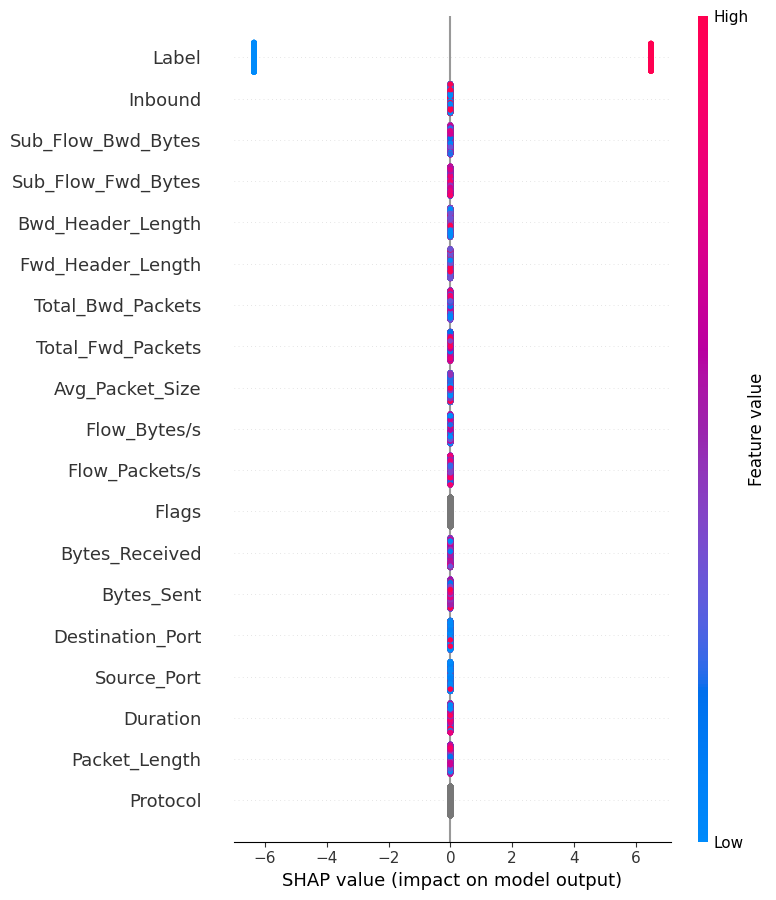

In [37]:
# Assuming X_train and y_train are already defined and preprocessed
# Train the XGBoost model
# Added enable_categorical=True
xgb_model = xgb.XGBClassifier(random_state=42, verbosity=1, eval_metric='logloss', enable_categorical=True)

# Convert 'Protocol' and 'Flags' columns to categorical type
for col in ['Protocol', 'Flags']:
    X_train[col] = X_train[col].astype('category')

xgb_model.fit(X_train, y_train)

# Create the SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

#  SHAP summary plot (beeswarm plot) to see the distribution
shap.summary_plot(shap_values, X_train, plot_type='dot')

# LIME

In [38]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=be8eb931ff9e4cbbf73e462556581b5efd3956fb34f04c8b075b56dafe9761e3
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [39]:
# Create a LabelEncoder object
encoder = LabelEncoder()

# Assuming 'Protocol' and 'Flags' are the columns with string values in X_train
for col in ['Protocol', 'Flags']:
    # Fit the encoder on the training data and transform it
    X_train[col] = encoder.fit_transform(X_train[col])
    # Transform the test data using the same encoder
    X_test[col] = encoder.transform(X_test[col])

# Now, you can train the model
rf = RandomForestClassifier(random_state=42) # Initialize the Random Forest model
rf.fit(X_train, y_train) # Train the model using your training data

RandomForestClassifier(random_state=42)

In [43]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=np.unique(y).astype(str),
    mode='classification'
)

# Explain a single instance
i = 0  # Index of the instance to explain
exp = explainer.explain_instance(X_test.iloc[i], rf.predict_proba)
exp.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [44]:
# Collect metrics for all models
models = {
    'Random Forest': y_pred_rf,
    'Stacking': y_pred_stack,
    'Voting': y_pred_voting
}

for model_name, y_pred in models.items():
    print(f"\n{model_name} Performance:")
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
    print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))



Random Forest Performance:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       146

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286


Stacking Performance:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       146

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286


Voting Performance:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0

Classification Report:
               precisio